<a href="https://colab.research.google.com/github/Eduard25/Redes/blob/master/5_RF_DataSetTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,SeparableConv2D,Dropout,Activation,MaxPooling2D,Flatten,BatchNormalization
from keras.optimizers import RMSprop, SGD, Adam
from keras import regularizers, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


In [ ]:
%pip install wandb

  Using cached wandb-0.16.6-py3-none-any.whl (2.2 MB)


In [ ]:
import wandb

AttributeError: module 'wandb.sdk' has no attribute 'lib'

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: ERROR API key must be 40 characters long, yours was 92
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
epochs = 5
batch_size = 20
optimizer = Adam

In [ ]:
wandb.init(project="RF_DataPrueba2")
wandb.config.epochs = epochs
wandb.config.batch_size = batch_size
wandb.config.optimizer = optimizer

NameError: name 'wandb' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Img/img_align_celeba/img_align_celeba

/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Img/img_align_celeba/img_align_celeba


In [ ]:
ls

In [ ]:
#Acomodamos los atributos
file_path = os.path.join('/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Anno', 'list_attr_celeba_veintemil.txt')

with open('/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Anno/list_attr_celeba_veintemil.txt', 'r') as f:
    print("skipping : " + f.readline())
    print("skipping headers : " + f.readline())

    # Luego, escribe el archivo en la ruta especificada
    with open('/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Anno/attr_celeba_prepared_veintemil.txt', 'w') as newf:
        for line in f:
            new_line = ' '.join(line.split())
            newf.write(new_line)
            newf.write('\n')

selected_columns = [0, 2, 3, 19, 20, 21, 22, 26, 32, 34, 37]

df = pd.read_csv('/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Anno/attr_celeba_prepared_veintemil.txt', sep=' ', header = None, usecols=selected_columns)

skipping : 20000

skipping headers : 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 



In [ ]:
print("-----------")
print(df[0].head())
print(df.iloc[:,1:].head())
print("----------")

-----------
0    000001.jpg
1    000002.jpg
2    000003.jpg
3    000004.jpg
4    000005.jpg
Name: 0, dtype: object
   2   3   19  20  21  22  26  28  32  34  37
0   1   1   1   1  -1   1  -1   1   1  -1   1
1  -1  -1  -1   1  -1   1  -1  -1   1  -1  -1
2  -1  -1  -1  -1   1  -1  -1   1  -1   1  -1
3  -1   1  -1  -1  -1  -1  -1   1  -1  -1   1
4   1   1   1  -1  -1  -1  -1   1  -1  -1   1
----------


In [ ]:
attributes=df.iloc[:,1:].to_numpy()
#attributes[attributes==-1]=0
attributes = np.where(attributes == -1, 0, attributes)

In [ ]:
attributes = df.replace(-1, 0, inplace=True)

In [ ]:
print("-----------")
print(df[0].head())
print(df.iloc[:,1:].head())
print("----------")

-----------
0    000001.jpg
1    000002.jpg
2    000003.jpg
3    000004.jpg
4    000005.jpg
Name: 0, dtype: object
   2   3   19  20  21  22  26  32  34  37
0   1   1   1   1   0   1   0   1   0   1
1   0   0   0   1   0   1   0   1   0   0
2   0   0   0   0   1   0   0   0   1   0
3   0   1   0   0   0   0   0   0   0   1
4   1   1   1   0   0   0   0   0   0   1
----------


In [ ]:
files = tf.data.Dataset.from_tensor_slices(df[0])
attributes = tf.data.Dataset.from_tensor_slices(df.iloc[:,1:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)

<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))>


In [ ]:
print("-----------")
print(df[0].head())
print(df.iloc[:,1:].head())
print("----------")

-----------
0    000001.jpg
1    000002.jpg
2    000003.jpg
3    000004.jpg
4    000005.jpg
Name: 0, dtype: object
   2   3   19  20  21  22  26  32  34  37
0   1   1   1   1   0   1   0   1   0   1
1   0   0   0   1   0   1   0   1   0   0
2   0   0   0   0   1   0   0   0   1   0
3   0   1   0   0   0   0   0   0   0   1
4   1   1   1   0   0   0   0   0   0   1
----------


In [ ]:
#Acomodamos las imágenes
path_to_images = '/content/gdrive/MyDrive/Neuronal Networks Class/Reconocimiento Facial/CalabE/Img/img_nueva_red/'
def process_file(file_name, attributes):
    image = tf.io.read_file(path_to_images + file_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [92, 92])
    image /= 255.0  #
    return image, attributes

labeled_images = data.map(process_file)

print(labeled_images)

<_MapDataset element_spec=(TensorSpec(shape=(92, 92, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))>


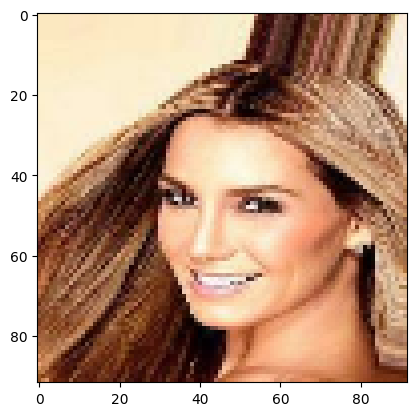

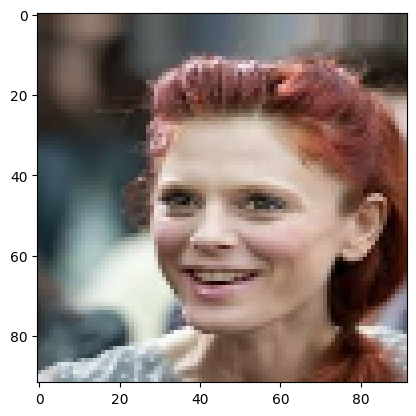

In [ ]:
for image, attri in labeled_images.take(2):
    plt.imshow(image)
    plt.show()

In [ ]:
Total = len(labeled_images)
print(Total)

20000


In [ ]:
images = labeled_images.shuffle(buffer_size=10*batch_size)
images = images.batch(batch_size)
train_images = images.take(int(0.8*Total))
test_images = images.skip(int(0.8*Total))

In [ ]:
inputs = keras.Input(shape=(92,92,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=8, kernel_size=5, use_bias=False)(x)

In [ ]:
print(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 92, 92, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
model = Sequential()

model.add(Conv2D(10, (3,3), input_shape=(92,92,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, (3,3), input_shape=(92,92,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, (3,3), input_shape=(92,92,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 90, 90, 10)        280       
                                                                 
 activation_20 (Activation)  (None, 90, 90, 10)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 88, 88, 10)        910       
                                                                 
 activation_21 (Activation)  (None, 88, 88, 10)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 44, 44, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 42, 42, 10)        910       
                                                      

In [ ]:

for size in (32, 64, 128, 256, 512):
    residual = x
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])



In [ ]:
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="sigmoid")(x)
outputs = layers.Dense(11, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 92, 92, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 92, 92, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 88, 88, 8)            600       ['rescaling[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 88, 88, 8)            32        ['conv2d[0][0]']              
 Normalization)                                                                               

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00000025), loss='binary_crossentropy')
model.fit(train_images, batch_size=batch_size, epochs=epochs, validation_data=test_images)
model.save("DataEntrenada5.hf5")

Epoch 1/5
1000/1000 [==============================] - ETA: 0s - loss: 0.4035

ValueError: Expected input data to be non-empty.